# Machine Learning and Data Processing
# Assignment 3
# Apple Quality Classification
Dataset: [https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality](https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality)

# Contributors
### Faris Abu Farha 1200546
### Omar Masalmah   1200060

## 1. import important libraries

In [33]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#dark theme
plt.style.use('dark_background')
import seaborn as sns


# 2. Load Data

In [34]:
df = pd.read_csv('dataset/apple_quality.csv')
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


# 3. EDA (Exploratory Data Analysis)

In [35]:
print('----------------')
print('Data shape')
print(df.shape)
print('----------------')

df.info()

----------------
Data shape
(4001, 9)
----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


we noticed that every attribute has 4000 values except for the last one which has 4001, let's check why

Check for missing values

In [36]:
df.isnull().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [37]:
df.tail()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


we noticed only one row contains Null values, it turned out to be the last row, tis row is  for author rights, so we will drop it 

In [38]:
#remove rows with missing values
df = df.dropna()
print(df.info())
df.tail()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 312.5+ KB
None


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [39]:
# It has been noticed that ID column is repeated, so we will drop it
df = df.drop('A_id', axis=1)  # axis = 1 means column
df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   object 
 7   Quality      4000 non-null   object 
dtypes: float64(6), object(2)
memory usage: 281.2+ KB


In [41]:
# Acidity Column Dtype is 'object' so we will convert it to float64 
df['Acidity'] = pd.to_numeric(df['Acidity'],
                              errors='coerce')  # errors='coerce' means if there is any error, it will be converted to NaN
print('----------------')
print('Check for NaN')
print(df.isnull().sum())
print('----------------')

df.info()

----------------
Check for NaN
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64
----------------
<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 281.2+ KB


Check for duplicate rows

In [42]:
print('----------------')
print('Check for duplicate rows')
print(df.duplicated().sum())
print('----------------')


----------------
Check for duplicate rows
0
----------------


Univariate analysis for each attribute 

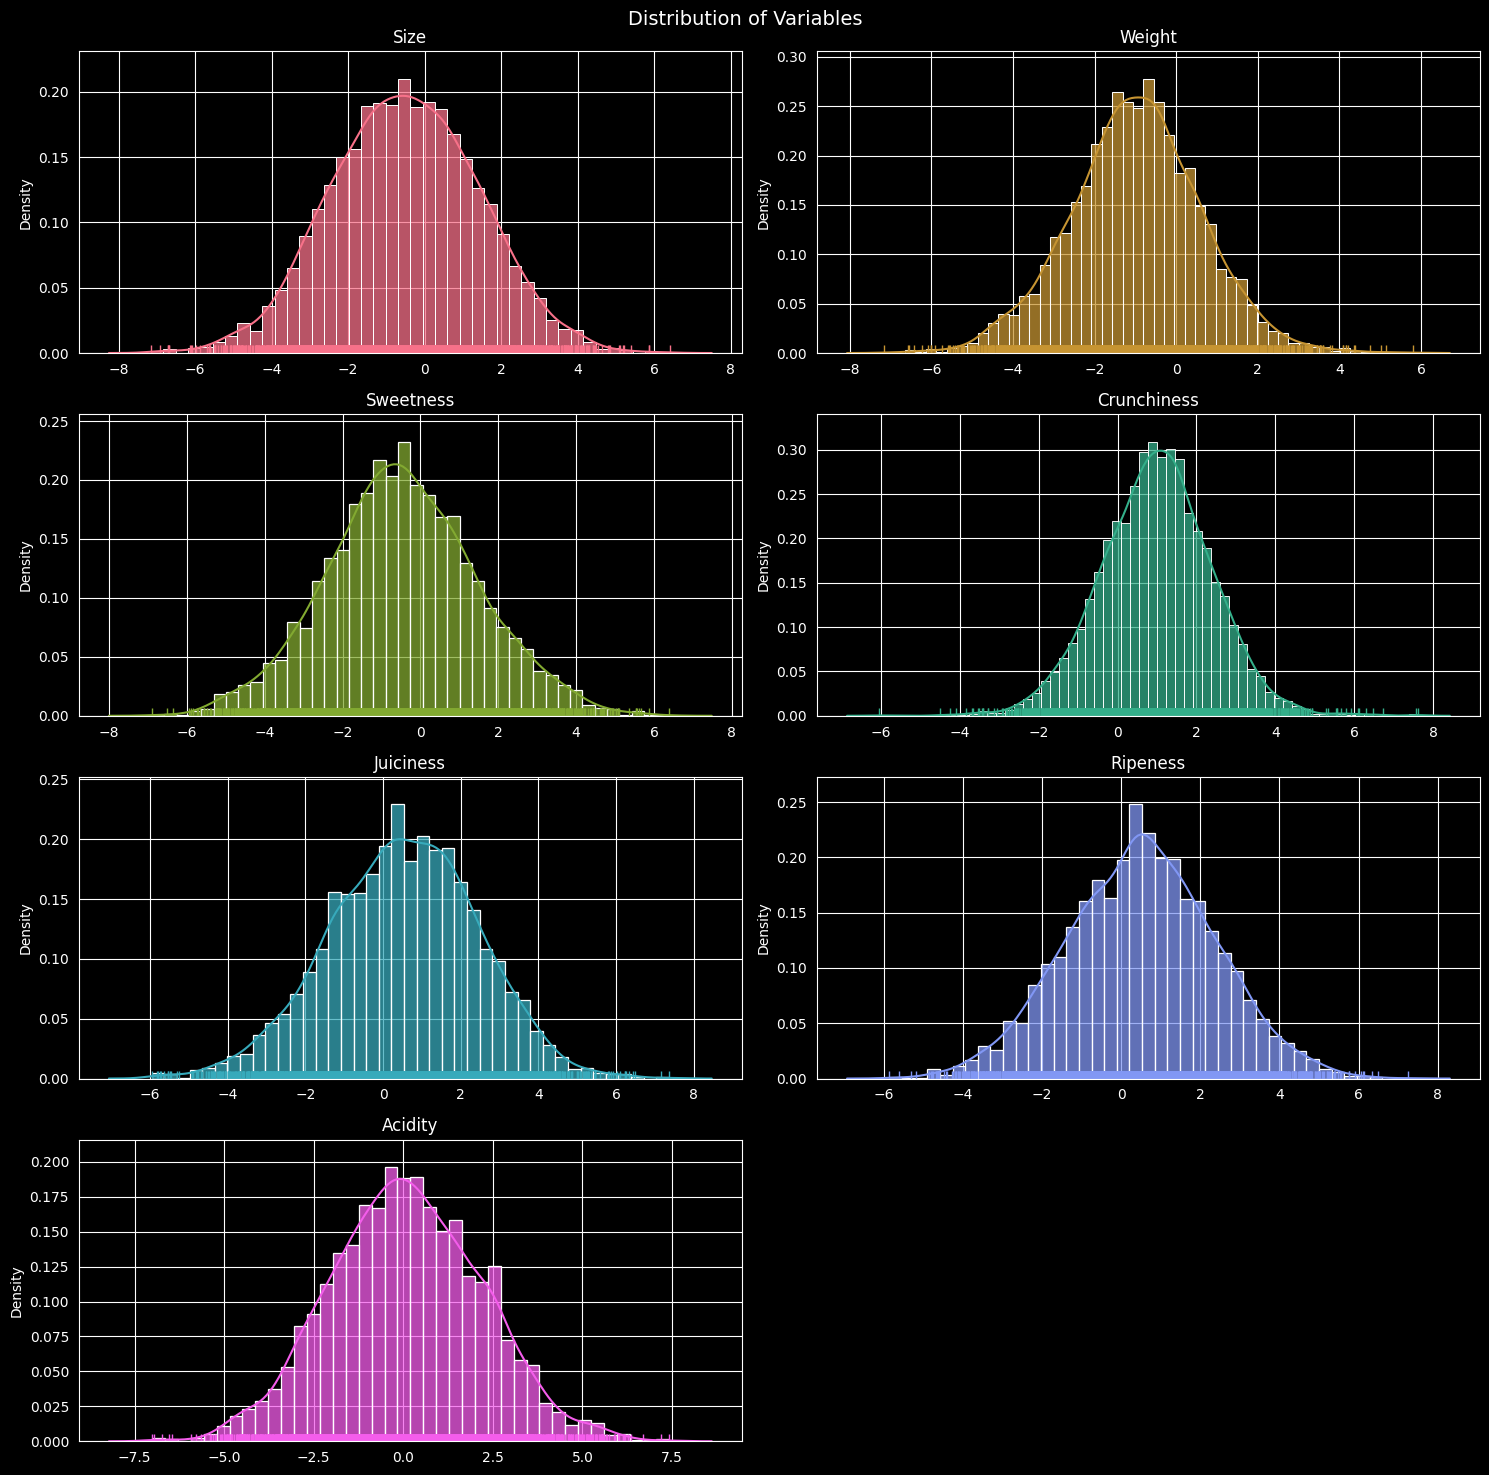

In [43]:
# Univariate analysis for each attribute
cols = df.columns[:-1]
colors = sns.color_palette('husl', len(cols))  # husl = hue saturation lightness

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))  # 3 rows, 3 columns 
axs = axs.flatten()  # flatten the 2D array to 1D array

for i, col in enumerate(cols):
    sns.kdeplot(df[col], ax=axs[i], color=colors[i])  # kdeplot = kernel density estimation plot 
    sns.histplot(df[col], ax=axs[i], color=colors[i], stat='density')  # histplot = histogram plot 
    sns.rugplot(df[col], ax=axs[i],
                color=colors[i])  # rugplot = draw a dash mark for every point on a univariate distribution

    axs[i].set_xlabel('')  # remove x label to avoid redundancy
    axs[i].set_title(col)
    plt.tight_layout()

fig.suptitle("Distribution of Variables", fontsize=14)
fig.delaxes(ax=axs[len(cols)])  # delete the last plot
fig.tight_layout()


In [44]:
# statistical summary for each attribute
df.describe().T  # 

,count,mean,std,min,25%,50%,75%,max
Size,4000.0,-0.503015,1.928059,-7.151703,-1.816765,-0.513703,0.805526,6.406367
Weight,4000.0,-0.989547,1.602507,-7.149848,-2.011770,-0.984736,0.030976,5.790714
Sweetness,4000.0,-0.470479,1.943441,-6.894485,-1.738425,-0.504758,0.801922,6.374916
Crunchiness,4000.0,0.985478,1.402757,-6.055058,0.062764,0.998249,1.894234,7.619852
Juiciness,4000.0,0.512118,1.930286,-5.961897,-0.801286,0.534219,1.835976,7.364403
Ripeness,4000.0,0.498277,1.874427,-5.864599,-0.771677,0.503445,1.766212,7.237837
Acidity,4000.0,0.076877,2.110270,-7.010538,-1.377424,0.022609,1.510493,7.404736


In [45]:
from scipy import stats  # import scipy.stats for skewness and kurtosis

# kurtosis and skewness

print('------------------------------------------------------------')
print('Kurtosis & Skewness')
print('------------------------------------------------------------')
cols = df.columns[:-1]
for col in cols:
    print(f"{col}: Kurtosis {stats.kurtosis(df[col])} | Skewness {stats.skew(df[col])}")
    print('------------------------------------------------------------')


------------------------------------------------------------
Kurtosis & Skewness
------------------------------------------------------------
Size: Kurtosis -0.08473614412348018 | Skewness -0.0024360294426308085
------------------------------------------------------------
Weight: Kurtosis 0.35710154859527776 | Skewness 0.0031004069327457127
------------------------------------------------------------
Sweetness: Kurtosis 0.01295451538904846 | Skewness 0.08381834394973907
------------------------------------------------------------
Crunchiness: Kurtosis 0.7196186480277955 | Skewness 0.00023001961531377834
------------------------------------------------------------
Juiciness: Kurtosis 0.027199863543157843 | Skewness -0.11337829624193697
------------------------------------------------------------
Ripeness: Kurtosis -0.07326004626903648 | Skewness -0.008760810490611875
------------------------------------------------------------
Acidity: Kurtosis -0.09483426783221782 | Skewness 0.05576253

In [46]:
def check_normality(data, alpha=0.05):
    """
    Check if the data is normally distributed or not
    """
    stat, p = stats.normaltest(data)
    if p >= alpha:
        return True
    else:
        return False


In [47]:
normal_dist_attributes = []
not_normal_dist_attributes = []

for col in cols:
    normal_dist_attributes.append(col) if check_normality(df[col]) else not_normal_dist_attributes.append(col)
    
print('NOT  Normal distributed attributes:')
print(len(not_normal_dist_attributes))
print(not_normal_dist_attributes)

print('----------------')
print('Normal distributed attributes:')
print(len(normal_dist_attributes))
print(normal_dist_attributes)

NOT  Normal distributed attributes:
3
['Weight', 'Crunchiness', 'Juiciness']
----------------
Normal distributed attributes:
4
['Size', 'Sweetness', 'Ripeness', 'Acidity']


Quality
good    2004
bad     1996
Name: count, dtype: int64


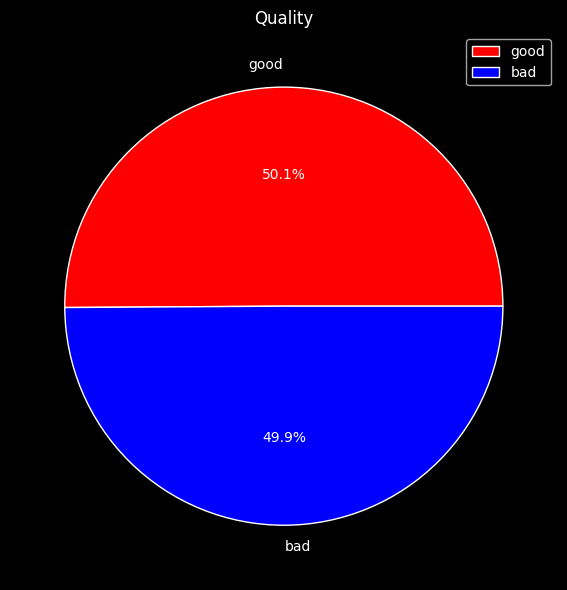

In [52]:
# plot pie chart of label and count 
# 
print(df['Quality'].value_counts())

plt.figure(figsize=(6, 6))
plt.pie(df['Quality'].value_counts(), labels=['good', 'bad'], autopct='%1.1f%%',colors=['red','blue'])
plt.legend()
plt.title('Quality')
plt.tight_layout()
plt.show()


class distribution is balanced so we don't need to do any sampling, we will use the data as it is, but we will convert the label to binary values for better processing, good = 1, bad = 0, we will do this in the preprocessing section. Accuarcy will be a good metric for this dataset

# 4. Preprocessing

# Converting Quality column to binary values for better processing

In [49]:
# df['Quality'] = (df['Quality'] == 'good').astype(int)  # good = 1, bad = 0

In [50]:
df['Quality'].value_counts()

Quality
good    2004
bad     1996
Name: count, dtype: int64

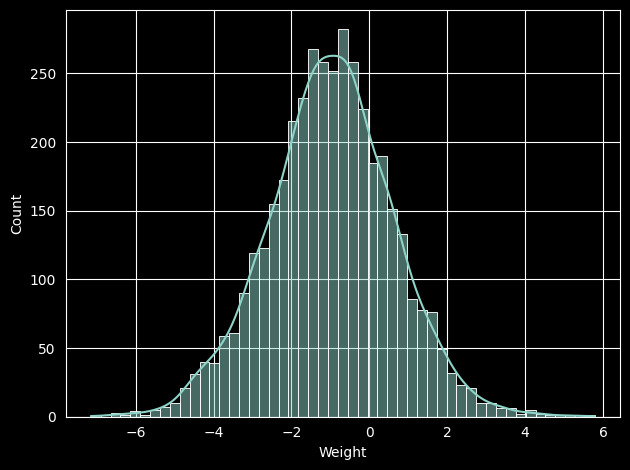

In [51]:
sns.histplot(df['Weight'], kde=True)  # kde = kernel density estimation
plt.tight_layout()
plt.show()